<a href="https://colab.research.google.com/github/ganesh3/pytorch-work/blob/master/pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook is based on [Learn Pytorch](https://www.learnpytorch.io/01_pytorch_workflow/) site and is essentially written line by line in order to learn

In [1]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering.items()

dict_items([(1, 'data (prepare and load)'), (2, 'build model'), (3, 'fitting the model to data (training)'), (4, 'making predictions and evaluating a model (inference)'), (5, 'saving and loading a model'), (6, 'putting it all together')])

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'1.12.1+cu113'

### Data (preparing and loading)

In [3]:
# we start with linear regression and knpwn parameter values
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
#checking why unsqueee to columns (dim=1 is required)
X_1 = torch.arange(0, 1, 0.02)
X_1.unsqueeze(dim=0), X_1

(tensor([[0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
          0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
          0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
          0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
          0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
          0.9000, 0.9200, 0.9400, 0.9600, 0.9800]]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]))

In [5]:
X[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

In [6]:
y[:5]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


Split data into training and test sets

In [7]:
# Create train/test split
train_split = int(0.8 * len(X)) #converted to int as indexes passed for split have to be integers
train_split

40

In [8]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split: ], y[train_split: ]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [9]:
# creating a function to visualize the data
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  Plots training, test data and compares prediction 
  """
  plt.figure(figsize=(10, 7))

  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #plot test data in blue
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test Data")

  #plot predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #show the legend
  plt.legend(prop={"size": 14});

In [10]:
plot_predictions.__doc__

'\n  Plots training, test data and compares prediction \n  '

In [11]:
plot_predictions()

In [12]:
#Create a Linear Regression model class
class LinearRegression(nn.Module):
  """
  weights: parameter that stores the weight
  bias: parameter that stores the bias
  """
  def __init__(self):
    super().__init__()
    self.weight = torch.nn.Parameter(torch.randn(1, dtype=torch.float,requires_grad=True))
    self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.weight * x + self.bias

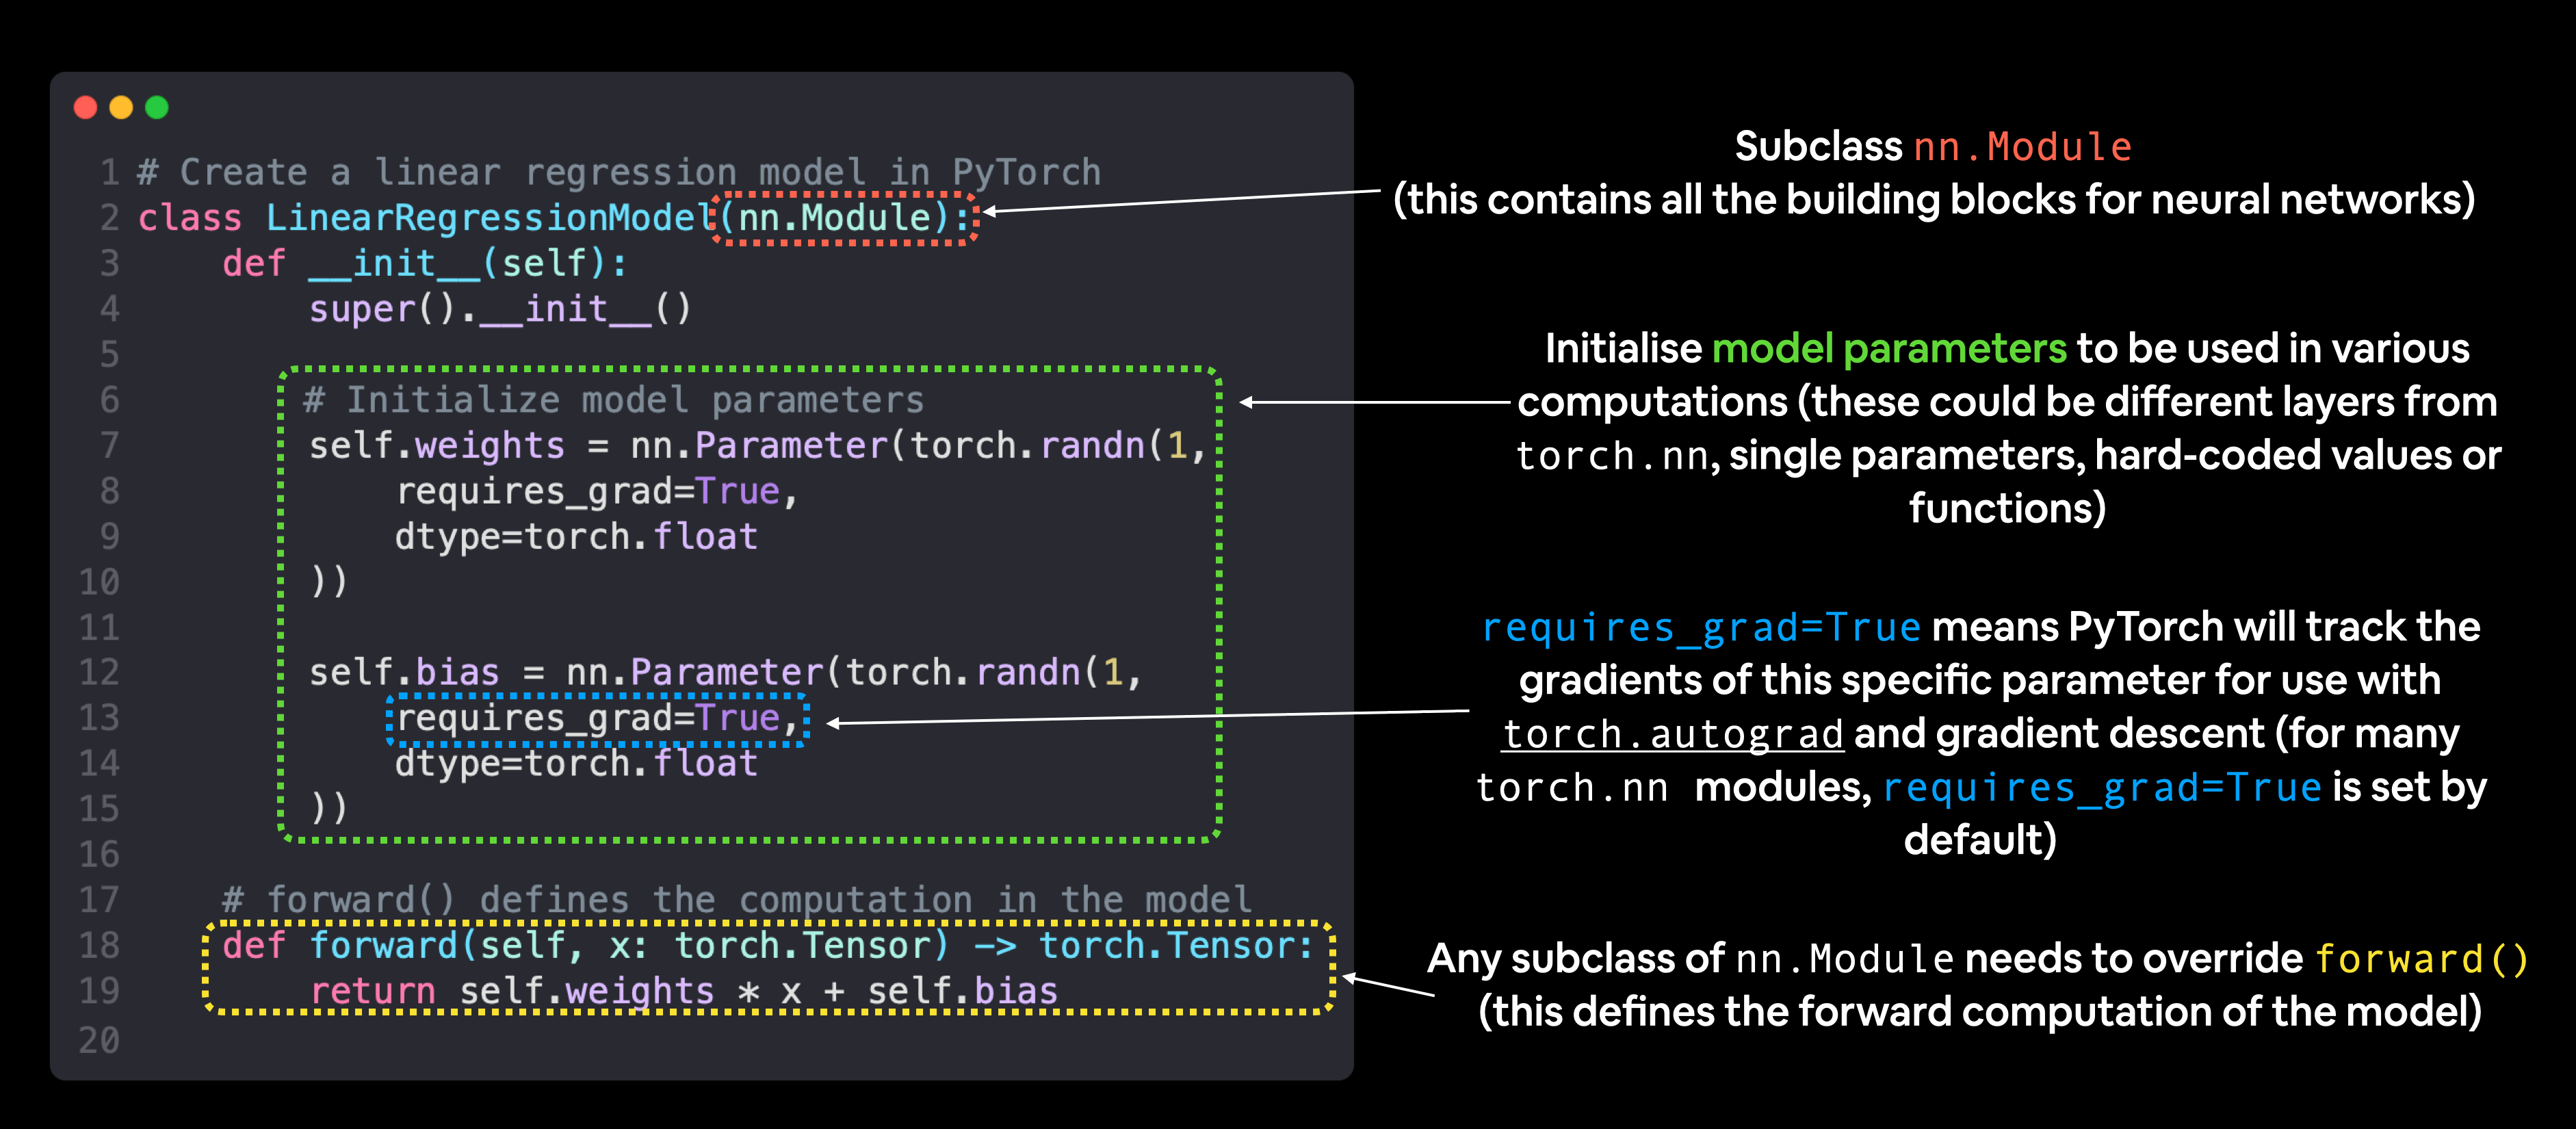

In [13]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

#instance of the model class
lr_model = LinearRegression()

In [14]:
#tyecasting to list will pring the parameters else it returns an object
list(lr_model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
# List named parameters 
lr_model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Make predictions with model
# torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) 
#to make forward-passes (data going through the forward() method) faster.
with torch.inference_mode():
  y_preds = lr_model(X_test)

In [17]:
# Check the predictions. Right now our model is making predictions using random parameters to make calculations, it's basically guessing
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")

Number of testing samples: 10
Number of predictions made: 10


In [18]:
print(f"Predicted values:\n{y_preds}")

Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


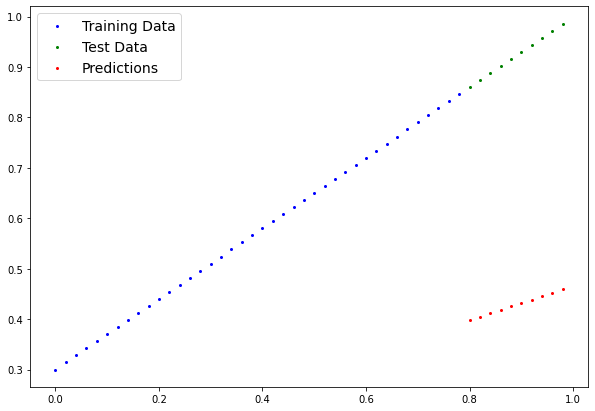

In [19]:
plot_predictions(predictions=y_preds)

In [20]:
#the preds are far off from actual values in y_test
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

### Train the model

In [21]:
# define the loss function
loss_fn = nn.L1Loss() #MAE Loss is same as L1 loss

#define the optimizer with the paramaters of the model i.e. weight & bias which needs to be optimized. The 2nd lr is learning rate wherease the first one in params is the model linear regression (lr)
optim = torch.optim.SGD(params=lr_model.parameters(), lr = 0.001)

Pytorch training loop


image.png

Pytorch testing loop

image.png

In [22]:
# The training loop
torch.manual_seed(42)

#set the number of epochs. Took me 1000 epoch as compared to 100 in learnpytorch.io site
num_epoch = 2000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(num_epoch):
  #put the model in training mode (this is the default state of a model)
  lr_model.train()

  #train the model
  y_pred = lr_model(X_train)

  #compute loss
  loss = loss_fn(y_pred, y_train)

  # zero grad of the optimizer
  optim.zero_grad()

  #loss backwards
  loss.backward()

  #progress the optimizer
  optim.step()

  #put the model in evaluation mode
  lr_model.eval()

  with torch.inference_mode():
    #prediction for test data
    test_pred = lr_model(X_test)

    #calculate the loss
    # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    
    # Print out what's happening
  if epoch % 100 == 0:
    epoch_count.append(epoch)
    # we use detach() in order to remove the computation graph of tensors so that torch.tensor is equivalent to np.ndarray 
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch is {epoch} and MAE train loss is {loss} and MAE test loss is {test_loss}")

Epoch is 0 and MAE train loss is 0.31288138031959534 and MAE test loss is 0.4931890368461609
Epoch is 100 and MAE train loss is 0.19767141342163086 and MAE test loss is 0.35847947001457214
Epoch is 200 and MAE train loss is 0.08973254263401031 and MAE test loss is 0.22795839607715607
Epoch is 300 and MAE train loss is 0.05357731133699417 and MAE test loss is 0.15086300671100616
Epoch is 400 and MAE train loss is 0.04549176245927811 and MAE test loss is 0.11657620966434479
Epoch is 500 and MAE train loss is 0.04160415381193161 and MAE test loss is 0.10088418424129486
Epoch is 600 and MAE train loss is 0.03811401128768921 and MAE test loss is 0.08986451476812363
Epoch is 700 and MAE train loss is 0.03466346859931946 and MAE test loss is 0.08097299933433533
Epoch is 800 and MAE train loss is 0.03122851625084877 and MAE test loss is 0.07297395914793015
Epoch is 900 and MAE train loss is 0.027794325724244118 and MAE test loss is 0.06490625441074371
Epoch is 1000 and MAE train loss is 0.0243

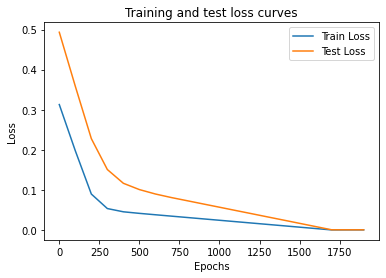

In [23]:
#plot the loss curves
plt.plot(epoch_count, train_loss_values, label= "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [24]:
#Find our models learned paramaters i.e. weight & bias
lr_model.state_dict()

OrderedDict([('weight', tensor([0.6994])), ('bias', tensor([0.2998]))])

In [25]:
print(f"And the originial values for weights and bias is: {weight} and {bias}")

And the originial values for weights and bias is: 0.7 and 0.3


### Making predictions with a trained PyTorch model (inference)

In [26]:
# 1. Set the model in evaluation mode
lr_model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = lr_model(X_test)
y_preds

tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])

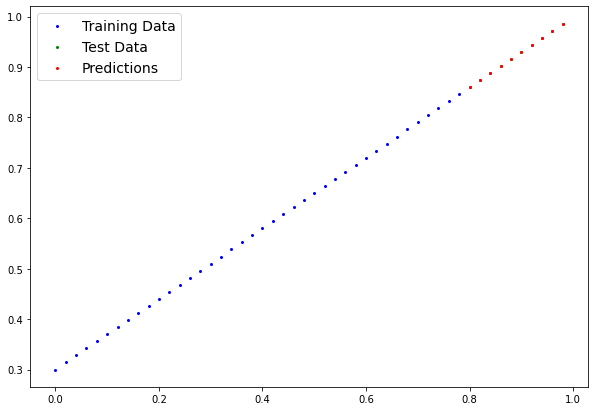

In [27]:
plot_predictions(predictions=y_preds)

### Saving and loading a PyTorch model

In [28]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [29]:
# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_lr_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
# only saving the state_dict() only saves the models learned parameters
torch.save(obj= lr_model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_lr_model.pth


In [30]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_lr_model.pth

-rw-r--r-- 1 root root 1063 Oct  2 05:15 models/01_pytorch_workflow_lr_model.pth


### Loading a saved PyTorch model's state_dict()

In [31]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

## Building a PyTorch linear model

image.png

In [32]:
class LinearRegressionV2Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [33]:
# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
lrv2_model = LinearRegressionV2Model()
lrv2_model.state_dict(), lrv2_model

(OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),
 LinearRegressionV2Model(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ))

In [39]:
# next () - Return the next item from the iterator. If default is given and the iterator
#is exhausted, it is returned instead of raising StopIteration.
next(lrv2_model.parameters())

Parameter containing:
tensor([[0.7645]], requires_grad=True)

In [37]:
list(lrv2_model.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True), Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [40]:
next(lrv2_model.parameters()).device

device(type='cpu')

In [43]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [44]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
lrv2_model.to(device)

LinearRegressionV2Model(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [45]:
next(lrv2_model.parameters()).device

device(type='cuda', index=0)

In [46]:
optim_2 = torch.optim.SGD(lrv2_model.parameters(), lr = 0.01)

In [49]:
#training the model
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  lrv2_model.train()

  pred = lrv2_model(X_train)

  train_loss = loss_fn(pred, y_train)

  optim_2.zero_grad()

  train_loss.backward()

  optim_2.step()

  lrv2_model.eval()

  with torch.inference_mode():
    pred_test = lrv2_model(X_test)

    loss_test = loss_fn(pred_test, y_test)

  if epoch % 100 == 0:
    print(f"Epoch number is {epoch}, MAE train loss is {train_loss}, and MAE test loss is {loss_test}")

Epoch number is 0, MAE train loss is 0.5551779866218567, and MAE test loss is 0.5739762187004089
Epoch number is 100, MAE train loss is 0.006215683650225401, and MAE test loss is 0.014086711220443249
Epoch number is 200, MAE train loss is 0.0012645035749301314, and MAE test loss is 0.013801801018416882
Epoch number is 300, MAE train loss is 0.0012645035749301314, and MAE test loss is 0.013801801018416882
Epoch number is 400, MAE train loss is 0.0012645035749301314, and MAE test loss is 0.013801801018416882
Epoch number is 500, MAE train loss is 0.0012645035749301314, and MAE test loss is 0.013801801018416882
Epoch number is 600, MAE train loss is 0.0012645035749301314, and MAE test loss is 0.013801801018416882
Epoch number is 700, MAE train loss is 0.0012645035749301314, and MAE test loss is 0.013801801018416882
Epoch number is 800, MAE train loss is 0.0012645035749301314, and MAE test loss is 0.013801801018416882
Epoch number is 900, MAE train loss is 0.0012645035749301314, and MAE te

In [51]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
print(lrv2_model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')), ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Making predictions

In [53]:
lrv2_model.eval()

with torch.inference_mode():
  test_pred = lrv2_model(X_test)

test_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

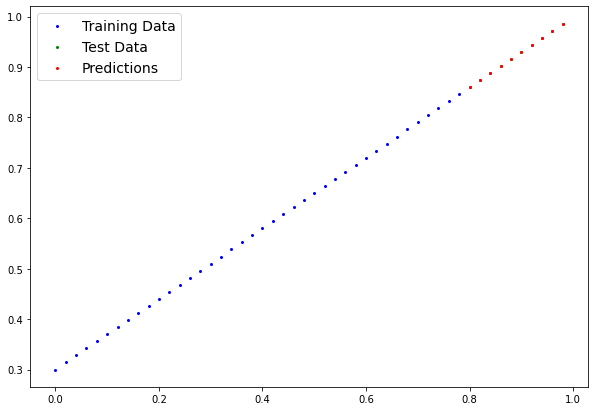

In [56]:
plot_predictions(predictions=test_pred.cpu())